In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}


In [3]:
webpage=requests.get("https://www.ambitionbox.com/overview/tcs-overview",headers=headers).text

In [4]:
soup=BeautifulSoup(webpage,'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <style>
   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}
  </style>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date)
  </script>
  <title>
   TCS Company Profile &amp; Overview | AmbitionBox
  </title>
  <meta content="2023 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta content="EN" data-n-head="ssr" name="content-language"/>
  <meta content="462822053404-hphug4pkahqljh2tc96g35at47o4isv2.apps.googleusercontent.c
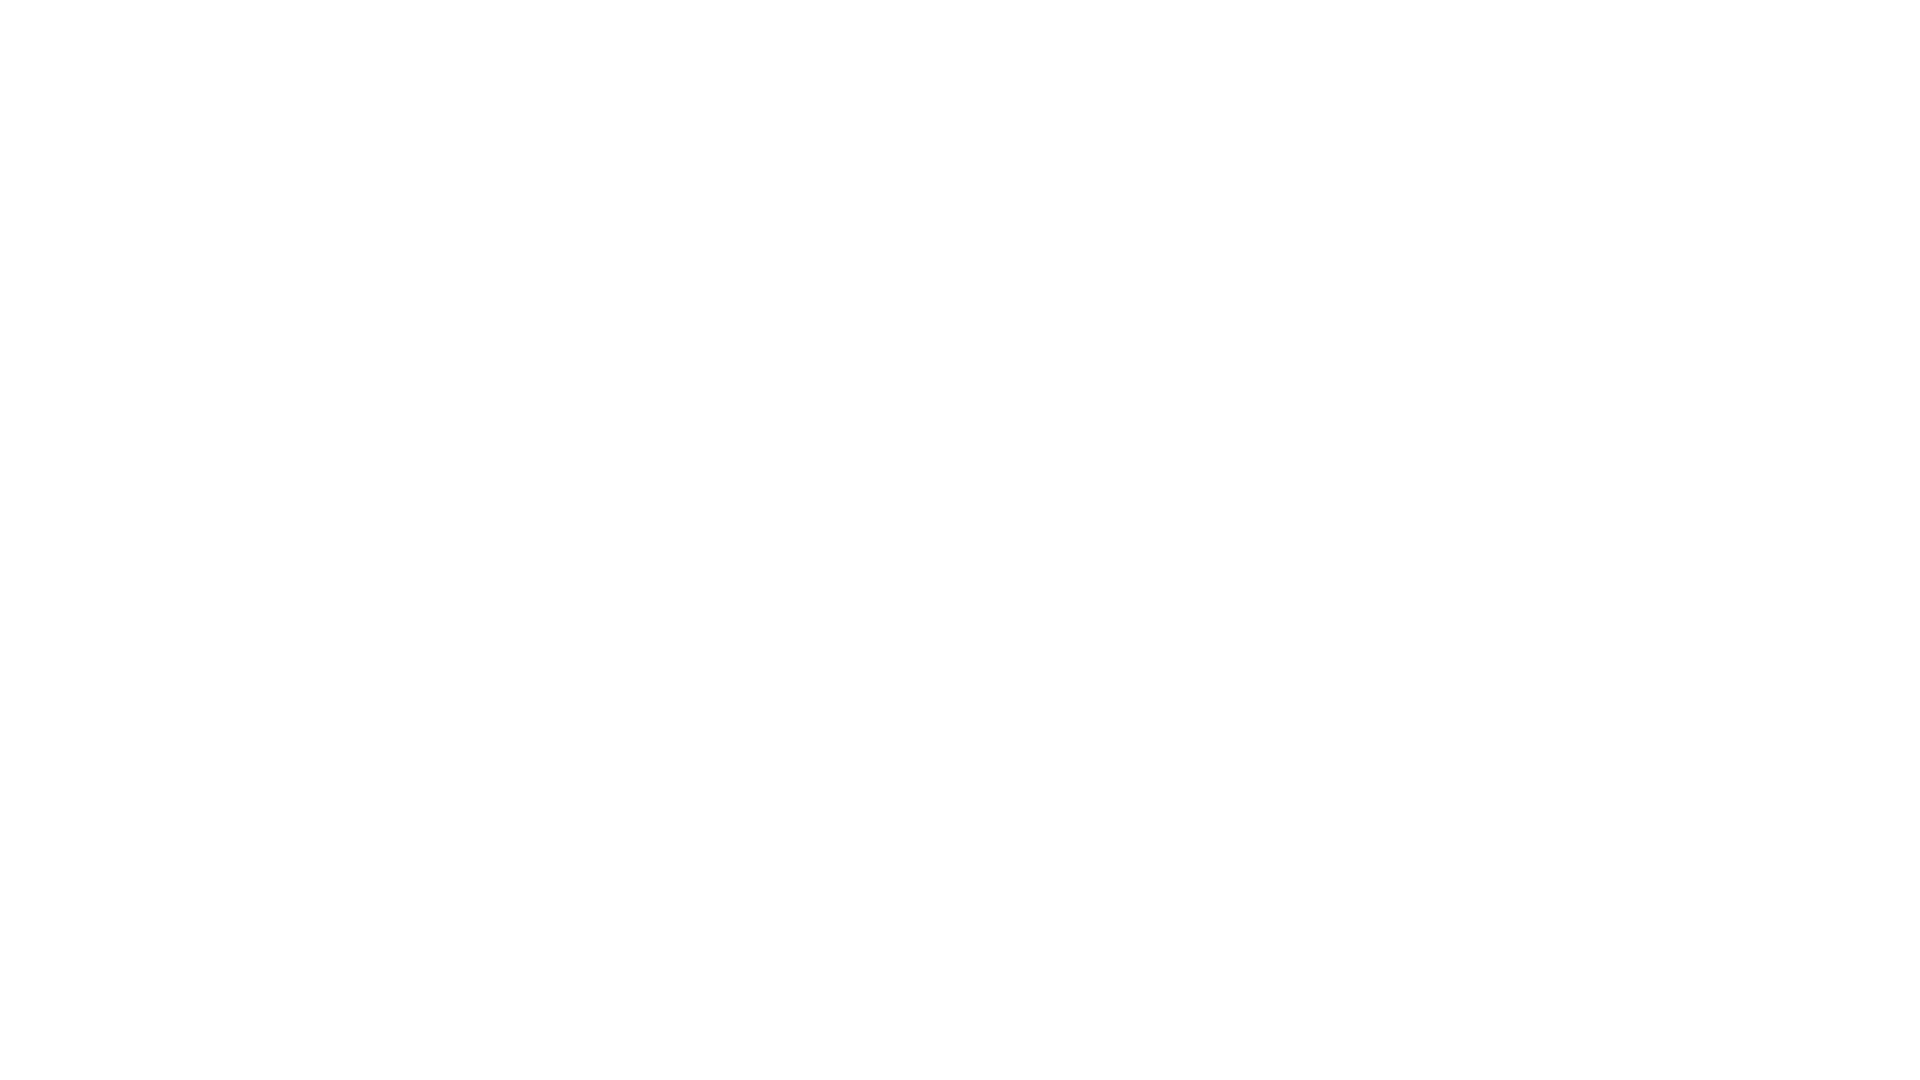
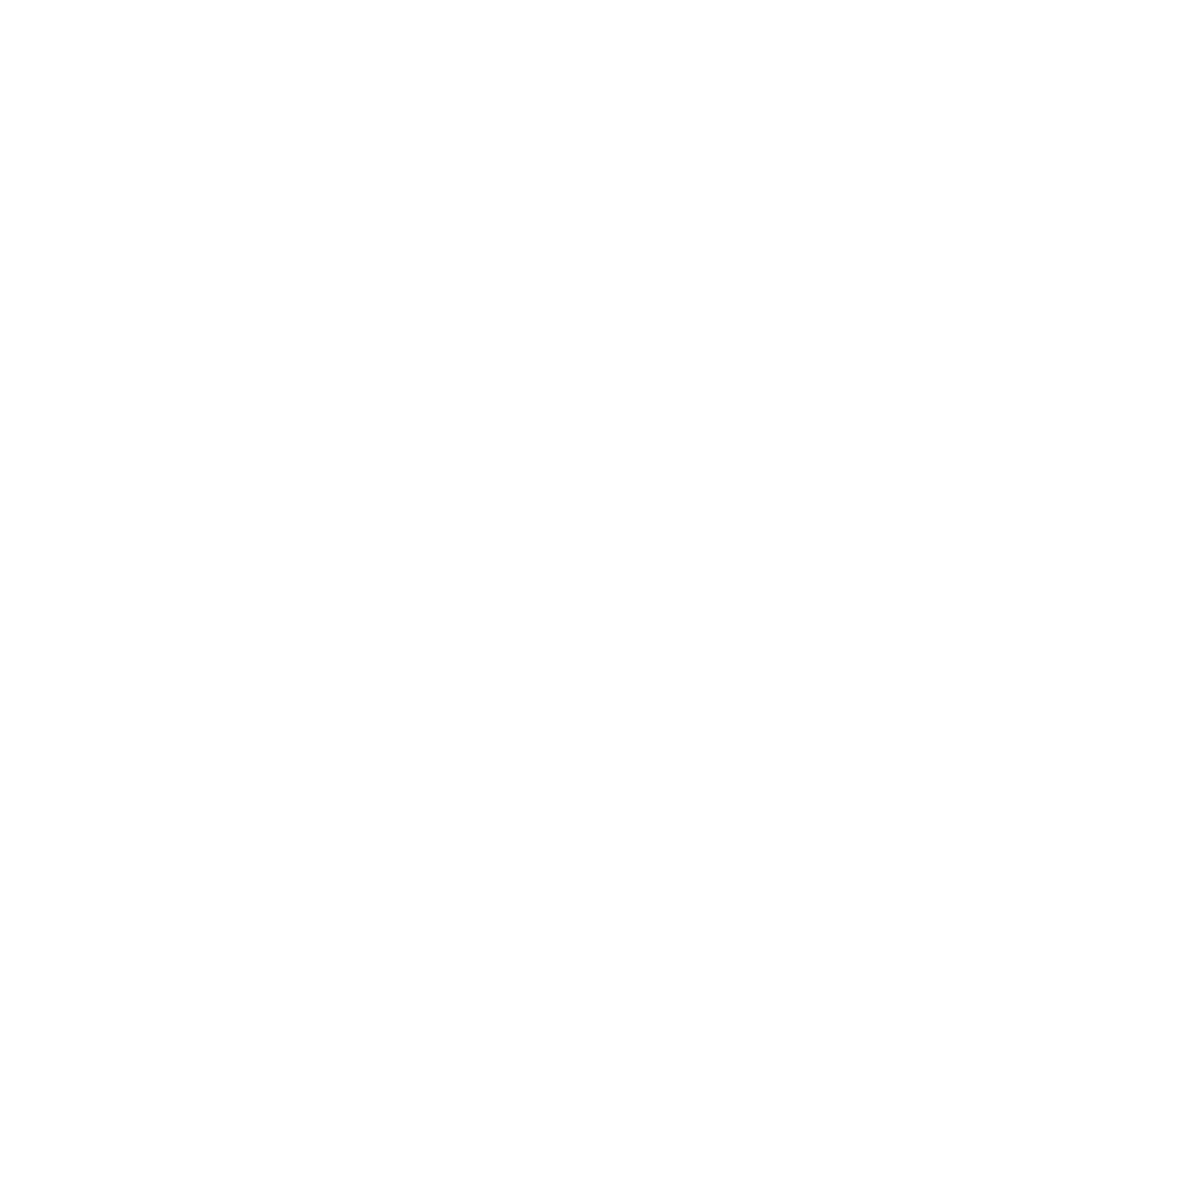

In [5]:
print(soup.prettify())

# Extracting the data from the Ambition Box 

In [6]:

data = []
def data_extract(web):
    url = "https://www.ambitionbox.com/overview/{}-overview".format(web)

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36'}
    response = requests.get(url, headers=headers).text
    soup = BeautifulSoup(response, 'lxml')

    company_info = []    
    
    main = soup.find('ul', class_="aboutTable") 
    
    for i, count in enumerate(main.find_all(attrs={"class": "textItem__val aboutItem__value"})):
    
        company_info.append((f'data_{i+1}', count.text.strip()))

    for i, count in enumerate(soup.find_all('span', attrs={"class": "nav-item__count"})):
        company_info.append((f'Container_{i+1}', count.text.strip()))
      
    
    url_salary = "https://www.ambitionbox.com/salaries/{}-salaries?designation=data-scientist&campaign=salaries_widget".format(web)

    response_1 = requests.get(url_salary, headers=headers).text
    soup_salary = BeautifulSoup(response_1, 'lxml')

    for j, count in enumerate(soup_salary.find("div",attrs={'class':"avg-salary"})):
        company_info.append((f'salary{j+1}', count.text.strip()))
        
    for j, count in enumerate(soup_salary.find("p",attrs={'class':"newHInfo__cNtxt"})):
        company_info.append((f'name{j+1}', count.text.strip()))
        

    data.append(dict(company_info))

In [7]:
data_extract("tcs")
data_extract("accenture")
data_extract("cognizant")
data_extract("wipro")
data_extract("amazon")
data_extract("ibm")
data_extract("flipkart")
data_extract("infosys")
data_extract("genpact")
data_extract("hcl-technologies")
data_extract("infosys")
data_extract("ibm")
data_extract("deloitte")
data_extract("reliance")
data_extract("flipkart")
data_extract("ernst-young")
data_extract("mindtree")
data_extract("bajaj-finserv")
data_extract("pwc")
data_extract("paytm")
data_extract("samsung")
data_extract("jp-morgan")
data_extract("kpmg-india")



In [8]:
df1 = pd.DataFrame(data) 



In [9]:
df1.T

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
data_1,1968 (55 yrs old),1989 (34 yrs old),1994 (29 yrs old),1945 (78 yrs old),1994 (29 yrs old),1911 (112 yrs old),2007 (16 yrs old),1981 (42 yrs old),1997 (26 yrs old),1991 (32 yrs old),...,1977 (46 yrs old),2007 (16 yrs old),2002 (21 yrs old),1999 (24 yrs old),2007 (16 yrs old),1880 (143 yrs old),2010 (13 yrs old),1938 (85 yrs old),2000 (23 yrs old),1987 (36 yrs old)
data_2,Public,Public,Private,Public,Public,Public,Public,Public,Public,Public,...,Public,Public,Private,Public,Public,Partnership,Public,Public,Private,Partnership
data_3,1 Lakh+,1 Lakh+,1 Lakh+,1 Lakh+,1 Lakh+,1 Lakh+,10k-50k,1 Lakh+,1 Lakh+,1 Lakh+,...,1 Lakh+,10k-50k,50k-1 Lakh,50k-1 Lakh,10k-50k,10k-50k,10k-50k,50k-1 Lakh,50k-1 Lakh,10k-50k
data_4,1 Lakh+,1 Lakh+,1 Lakh+,10k-50k,1 Lakh+,1 Lakh+,10k-50k,1 Lakh+,1 Lakh+,1 Lakh+,...,1 Lakh+,10k-50k,1 Lakh+,"Bangalore/Bengaluru, Karnataka, India",10k-50k,1 Lakh+,"Noida, India","Seoul, South Korea",1 Lakh+,10k-50k
data_5,"Mumbai, Maharashtra, India","Dublin, Ireland","Teaneck. New Jersey., United States (USA)","Bangalore/Bengaluru, Karnataka, India","Seattle,Washington, United States","Armonk,New York, United States","Bangalore,Karnataka, India","Bengaluru/Bangalore, Karnataka, India","New York, New York, United States (USA)","Noida, Uttar Pradesh,",...,"Navi Mumbai, Maharashtra, India","Bangalore,Karnataka, India","London, England",Debashis Chatterjee,"Pune,Maharashtra, India","London, United Kingdom, United Kingdom (UK)",Vijay Shekhar Sharma,"Koh, Dong Jin","New York, New York, United States (USA)",Foreign MNC
data_6,Rajesh Gopinathan,Fabio Benasso,Ravi Kumar S,Anis Chenchah,Andy Jassy,Arvind Krishna,Kalyan Krishnamurthy,Salil Parekh,Hailey Eichner,C Vijayakumar,...,Indian MNC,Kalyan Krishnamurthy,Carmine Di Sibio,Indian MNC,Sanjiv Bajaj,Foreign MNC,Corporate,Foreign MNC,Douglas B. Petno,NaN
data_7,Indian MNC,Foreign MNC,Foreign MNC,Indian MNC,Foreign MNC,Foreign MNC,Corporate,Indian MNC,Corporate,Indian MNC,...,info@ril.com,Corporate,Foreign MNC,8067064000,Corporate,NaN,NaN,NaN,Foreign MNC,NaN
Container_1,70.7k,44.8k,40.3k,37.9k,20.1k,19.2k,9.4k,30.7k,25.3k,27.3k,...,13k,9.4k,8.5k,7.3k,7.1k,6.7k,5.5k,6.6k,4.9k,4.2k
Container_2,852.2k,581.9k,559.2k,413.4k,141.6k,224.4k,47.1k,460.7k,189.9k,288.8k,...,66.1k,47.1k,123.1k,93.9k,25.4k,81.9k,30k,21.2k,72.1k,62.8k
Container_3,5.9k,4.1k,3.5k,3.4k,3.3k,1.4k,978,4.6k,1.9k,2.4k,...,901,978,737,880,326,762,409,336,391,488


In [10]:
df1.to_csv("company_data.csv",index=False)

In [11]:
df1

,data_1,data_2,data_3,data_4,data_5,data_6,data_7,Container_1,Container_2,Container_3,...,Container_8,salary1,salary2,salary3,name1,name2,name3,name4,data_8,data_9
0,1968 (55 yrs old),Public,1 Lakh+,1 Lakh+,"Mumbai, Maharashtra, India",Rajesh Gopinathan,Indian MNC,70.7k,852.2k,5.9k,...,61,"₹\n\t\t\t\t\t\t\t\t\t\t9,92,125/year",,(₹4.0L/yr - ₹17.0L/yr),TCS,,,,NaN,NaN
1,1989 (34 yrs old),Public,1 Lakh+,1 Lakh+,"Dublin, Ireland",Fabio Benasso,Foreign MNC,44.8k,581.9k,4.1k,...,56,"₹\n\t\t\t\t\t\t\t\t\t\t15,14,625/year",,(₹6.5L/yr - ₹24.0L/yr),Accenture,,,,NaN,NaN
2,1994 (29 yrs old),Private,1 Lakh+,1 Lakh+,"Teaneck. New Jersey., United States (USA)",Ravi Kumar S,Foreign MNC,40.3k,559.2k,3.5k,...,48,"₹\n\t\t\t\t\t\t\t\t\t\t11,88,475/year",,(₹5.0L/yr - ₹21.2L/yr),Cognizant,,,,NaN,NaN
3,1945 (78 yrs old),Public,1 Lakh+,10k-50k,"Bangalore/Bengaluru, Karnataka, India",Anis Chenchah,Indian MNC,37.9k,413.4k,3.4k,...,46,"₹\n\t\t\t\t\t\t\t\t\t\t10,86,645/year",,(₹4.8L/yr - ₹16.9L/yr),Wipro,,,,info@wipro.com,8028440011
4,1994 (29 yrs old),Public,1 Lakh+,1 Lakh+,"Seattle,Washington, United States",Andy Jassy,Foreign MNC,20.1k,141.6k,3.3k,...,87,"₹\n\t\t\t\t\t\t\t\t\t\t28,85,094/year",,(₹12.0L/yr - ₹50.0L/yr),Amazon,,,,NaN,NaN
5,1911 (112 yrs old),Public,1 Lakh+,1 Lakh+,"Armonk,New York, United States",Arvind Krishna,Foreign MNC,19.2k,224.4k,1.4k,...,31,"₹\n\t\t\t\t\t\t\t\t\t\t19,47,773/year",,(₹10.4L/yr - ₹32.0L/yr),IBM,,,,NaN,NaN
6,2007 (16 yrs old),Public,10k-50k,10k-50k,"Bangalore,Karnataka, India",Kalyan Krishnamurthy,Corporate,9.4k,47.1k,978,...,29,"₹\n\t\t\t\t\t\t\t\t\t\t27,48,846/year",,(₹13.8L/yr - ₹40.6L/yr),Flipkart,,,,NaN,NaN
7,1981 (42 yrs old),Public,1 Lakh+,1 Lakh+,"Bengaluru/Bangalore, Karnataka, India",Salil Parekh,Indian MNC,30.7k,460.7k,4.6k,...,24,"₹\n\t\t\t\t\t\t\t\t\t\t9,86,848/year",,(₹4.0L/yr - ₹16.5L/yr),Infosys,,,,NaN,NaN
8,1997 (26 yrs old),Public,1 Lakh+,1 Lakh+,"New York, New York, United States (USA)",Hailey Eichner,Corporate,25.3k,189.9k,1.9k,...,37,"₹\n\t\t\t\t\t\t\t\t\t\t14,81,596/year",,(₹6.5L/yr - ₹25.0L/yr),Genpact,,,,NaN,NaN
9,1991 (32 yrs old),Public,1 Lakh+,1 Lakh+,"Noida, Uttar Pradesh,",C Vijayakumar,Indian MNC,27.3k,288.8k,2.4k,...,27,"₹\n\t\t\t\t\t\t\t\t\t\t9,22,806/year",,(₹3.0L/yr - ₹16.2L/yr),HCLTech,,,,NaN,NaN
